## Content

- **Autoencoders Intuition**

- **Applications of AE**

- **Feature Extraction and Transfer Learning**

- **Denoising AE**

- **Recommender Sys using AE**

## Intuition

Consider the following network

<center><img src='https://drive.google.com/uc?id=14rwawgLT6K4BNqoZG5wDNW5YpinZKzon' width="800"></center>


Notice that
- all the layers have same number of nuerons including the input and output layer
- the input to the network is $x_i$ and output is $x̂_i$

#### Question: We want to feed in $x_i$ to network and get output $x̂_i$ such that $x_i$ ≃ $x̂_i$. Is it possible ? 

Yes. Just make all the activation as linear
- i.e. whatever gets in gets out
- and train the n/w to find weights and biases

Now, let's introduce a little complexity to our network 

<center><img src='https://drive.google.com/uc?id=1W1osKP2VC5y6PR3HeoZXX38Inrtrrq4C' width="800"></center>


#### Question: For this network, can we make $x_i$ = $x̂_i$ ? 

The task is possible. We can make a prediction s.t. $x_i$ ∼ $x̂_i$
- but it can't be perfectly same

We can decide some loss based on the problem
- if the values are binary, we can use binary cross entropy
- for multiclass, we can use categorical cross entropy
- for continuous values, we can use MSE or RMSE.




<center><img src='https://drive.google.com/uc?id=1d7YnE8uiWYFR-rwWDC3j8E4J7vnOPNVr' width="800"></center>



#### What exactly happened in this network ? 

Out input was 6 dimension
- it went to 4 dimension
- and then 2 -> 4 -> 6 .

Let's focus on the layer in the middle i.e. layer with 2 neuron 

If we were to ignore the network before it,
- we can say that the this middle layer (2 neuron layer) is the input for next layers


In other words,
- 2D input gave us 6D output


<center><img src='https://drive.google.com/uc?id=1TUxyggf2bNMKGR12Dftz9f-QVzLB_-UM' width="800"></center>


If we are able to produce 6D output ($x̂_i$) which similar to $x_i$, it means
- all the information available to produce this was available.



<center><img src='https://drive.google.com/uc?id=1-JsrXkjjLtWx3igRlavf74-BpSGDF8RV' width="700"></center>



Now, imagine instead of 6-D input vector
- We have a sparse vector of 300-dim.

And using the network,
- we step it down to 32 dim till middle layer



#### Doesn't it look like we are compressing our data ?

We are basically reducing the dimensions of our input.

<center><img src='https://drive.google.com/uc?id=1b3j3o6wE4eaFLXON7i6QuXU0sK1fjSg7' width="700"></center>

So, in summary,
- the left part of network is trying to compress the information i.e. **encoder**
- the right part of netowork is decompressing it i.e. **decoder**

And this had to happen so meaningfully s.t.
- all the info would be stored at middle layer.


This means we can use middle layer (bottleneck layer) as an **embedding/encoding or latent features**
- i.e. we can use this bottleneck as features.

And this network is known as **Autoencoder**

The purpose of the network is to get the embedding

## Applications

<center><img src='https://drive.google.com/uc?id=1Ufe6jP8P_wCKM1lF1CF5fL9wO-wsNkjQ' width="700"></center>

**1. Dimensionality Reduction/ Compression**

Here, compression doesn't mean reducing the space 
- but to reduce the number of features of input vectors

Reducing the dimensions means
- faster inference time
- low latency 


We can also use these embeddings for visualization

**2. Denoising**

We can use AE (Autoencoders) to denoise the data

**3. Embeddings**

We can use AE to generate embeddings
- These embeddings can be used for 
    - recommender system
    - clustering
    - image search

### Dimensionality reduction

#### Question: Can we create a PCA equivalent network ? 

Say, we have 
- d dim input data

And we want to go to d' dim. (d' < d)


So, the network would like : 

<center><img src='https://drive.google.com/uc?id=1ueq8VloMAsG-qmeyeIkZ0ZQiY15Io2ZC' width="700"></center>


Do note that
- we don't really need the prediction

We need the encoding coz 
- the fact the we can go back from encoding means that 
- encoding must have all that information to recreate the original vector.

#### Question: Is it required for encoder and decoder to be symmetric ? 

<center><img src='https://drive.google.com/uc?id=1lmV8IkoX9ZfR88rJODnS9jru9KfoETLm' width="700"></center>



It doesn't really have to be symmetric
- Earlier, we used to keep the it symmertric
    - i.e. same number of layer and same number of neuron 
- Also, weight were shared (tying weights) between encoder and decoder.
    - so as to reduce the number of parameters

There is no more necessary for that and we can have separate weights for enoder and decoder



#### Code walkthrough - Dimensionality-Reduction (using AE)

In [ ]:

#Source and Reference: https://blog.keras.io/building-autoencoders-in-keras.html


import keras
from keras import layers
from keras.datasets import mnist
import numpy as np



(x_train, y_train), (x_test, y_test) = mnist.load_data()

#Normalization of input
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.

#Reshaping the images to 1D vectors
x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))
print(x_train.shape)
print(x_test.shape)

11490434/11490434 [==============================] - 0s 0us/step
(60000, 784)
(10000, 784)


In [ ]:
print(y_train.shape)
print(y_test.shape)

(60000,)
(10000,)


In [ ]:
#AutoEncoder model
input_img = keras.Input(shape=(784,))
encoded = layers.Dense(128, activation='relu')(input_img)
encoded = layers.Dense(64, activation='relu')(encoded)
encoded = layers.Dense(32, activation='relu')(encoded)


decoded = layers.Dense(64, activation='relu')(encoded)
decoded = layers.Dense(128, activation='relu')(decoded)
decoded = layers.Dense(784, activation='sigmoid')(decoded)



In [ ]:
autoencoder = keras.Model(input_img, decoded)
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

autoencoder.fit(x_train, x_train,
                epochs=100,
                batch_size=256,
                shuffle=True,
                validation_data=(x_test, x_test))

Epoch 1/100
235/235 [==============================] - 6s 9ms/step - loss: 0.2428 - val_loss: 0.1650
Epoch 2/100
235/235 [==============================] - 1s 6ms/step - loss: 0.1481 - val_loss: 0.1348
Epoch 3/100
235/235 [==============================] - 2s 7ms/step - loss: 0.1294 - val_loss: 0.1223
Epoch 4/100
235/235 [==============================] - 2s 8ms/step - loss: 0.1203 - val_loss: 0.1157
Epoch 5/100
235/235 [==============================] - 2s 8ms/step - loss: 0.1140 - val_loss: 0.1099
Epoch 6/100
235/235 [==============================] - 1s 6ms/step - loss: 0.1094 - val_loss: 0.1061
Epoch 7/100
235/235 [==============================] - 2s 7ms/step - loss: 0.1059 - val_loss: 0.1033
Epoch 8/100
235/235 [==============================] - 1s 6ms/step - loss: 0.1032 - val_loss: 0.1009
Epoch 9/100
235/235 [==============================] - 2s 7ms/step - loss: 0.1012 - val_loss: 0.0991
Epoch 10/100
235/235 [==============================] - 1s 6ms/step - loss: 0.0996 - val_lo

In [ ]:
autoencoder.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 784)]             0         
                                                                 
 dense (Dense)               (None, 128)               100480    
                                                                 
 dense_1 (Dense)             (None, 64)                8256      
                                                                 
 dense_2 (Dense)             (None, 32)                2080      
                                                                 
 dense_3 (Dense)             (None, 64)                2112      
                                                                 
 dense_4 (Dense)             (None, 128)               8320      
                                                                 
 dense_5 (Dense)             (None, 784)               101136

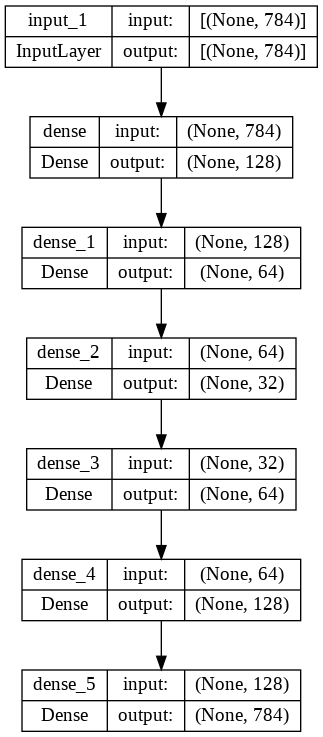

In [ ]:
from keras.utils.vis_utils import plot_model

plot_model(autoencoder, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

313/313 [==============================] - 1s 2ms/step


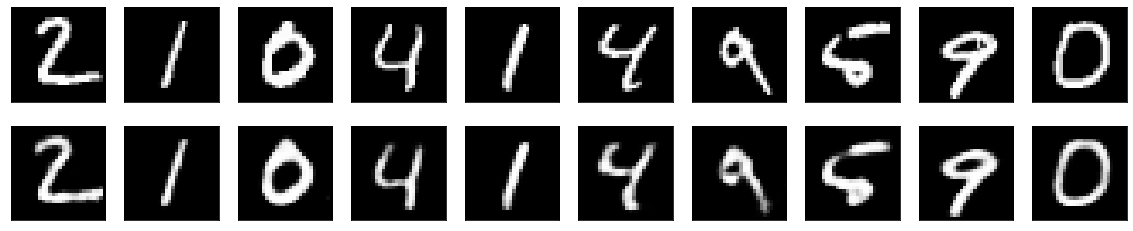

In [ ]:
#Visualize the outputs
import matplotlib.pyplot as plt

decoded_imgs = autoencoder.predict(x_test)

n = 10
plt.figure(figsize=(20, 4))
for i in range(1, n + 1):
    # Display original
    ax = plt.subplot(2, n, i)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # Display reconstruction
    ax = plt.subplot(2, n, i + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

### AutoEncoder model for 2D encoding


In [ ]:
#AutoEncoder model for 2D encoding
input_img = keras.Input(shape=(784,))
encoded = layers.Dense(128, activation='relu')(input_img)
encoded = layers.Dense(64, activation='relu')(encoded)
encoded = layers.Dense(32, activation='relu')(encoded)
encoded = layers.Dense(16, activation='relu')(encoded)
encoded = layers.Dense(8, activation='relu')(encoded)
encoded = layers.Dense(4, activation='relu')(encoded)
encoded = layers.Dense(2, activation='relu')(encoded)

decoded = layers.Dense(4, activation='relu')(encoded)
decoded = layers.Dense(8, activation='relu')(decoded)
decoded = layers.Dense(16, activation='relu')(decoded)
decoded = layers.Dense(32, activation='relu')(decoded)
decoded = layers.Dense(64, activation='relu')(decoded)
decoded = layers.Dense(128, activation='relu')(decoded)
decoded = layers.Dense(784, activation='sigmoid')(decoded)



In [ ]:
model = keras.Model(input_img, decoded)
model.compile(optimizer='adam', loss='binary_crossentropy')


In [ ]:
model.summary()

Model: "model_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_6 (InputLayer)        [(None, 784)]             0         
                                                                 
 dense_36 (Dense)            (None, 128)               100480    
                                                                 
 dense_37 (Dense)            (None, 64)                8256      
                                                                 
 dense_38 (Dense)            (None, 32)                2080      
                                                                 
 dense_39 (Dense)            (None, 16)                528       
                                                                 
 dense_40 (Dense)            (None, 8)                 136       
                                                                 
 dense_41 (Dense)            (None, 4)                 36 

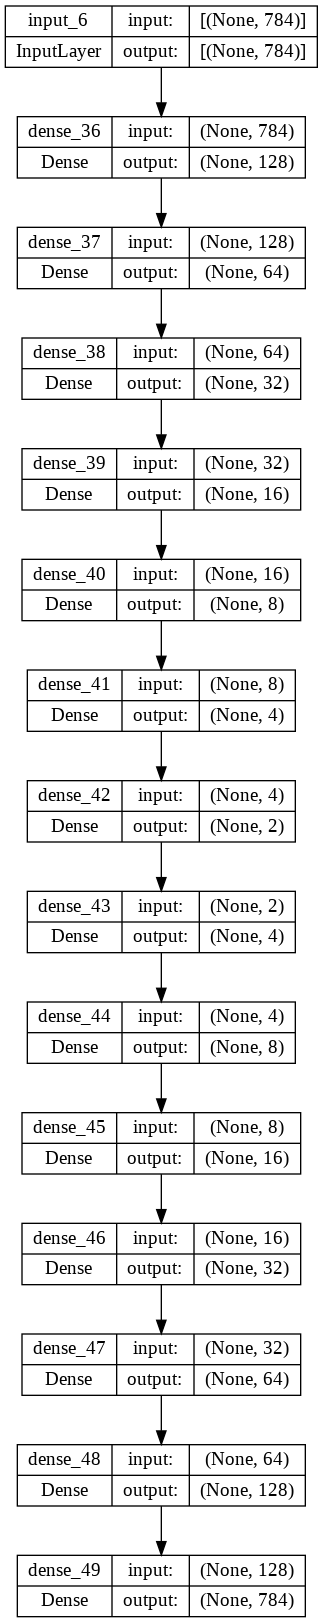

In [ ]:
plot_model(model, to_file='model.png', show_shapes=True, show_layer_names=True)

In [ ]:
model.fit(x_train, x_train,
                epochs=100,
                batch_size=256,
                shuffle=True,
                validation_data=(x_test, x_test))

Epoch 1/100
235/235 [==============================] - 2s 6ms/step - loss: 0.2860 - val_loss: 0.2507
Epoch 2/100
235/235 [==============================] - 1s 5ms/step - loss: 0.2487 - val_loss: 0.2465
Epoch 3/100
235/235 [==============================] - 1s 5ms/step - loss: 0.2433 - val_loss: 0.2384
Epoch 4/100
235/235 [==============================] - 1s 5ms/step - loss: 0.2344 - val_loss: 0.2305
Epoch 5/100
235/235 [==============================] - 1s 6ms/step - loss: 0.2286 - val_loss: 0.2264
Epoch 6/100
235/235 [==============================] - 1s 5ms/step - loss: 0.2259 - val_loss: 0.2238
Epoch 7/100
235/235 [==============================] - 1s 5ms/step - loss: 0.2224 - val_loss: 0.2203
Epoch 8/100
235/235 [==============================] - 1s 5ms/step - loss: 0.2183 - val_loss: 0.2178
Epoch 9/100
235/235 [==============================] - 1s 5ms/step - loss: 0.2171 - val_loss: 0.2161
Epoch 10/100
235/235 [==============================] - 1s 5ms/step - loss: 0.2147 - val_lo

313/313 [==============================] - 1s 2ms/step


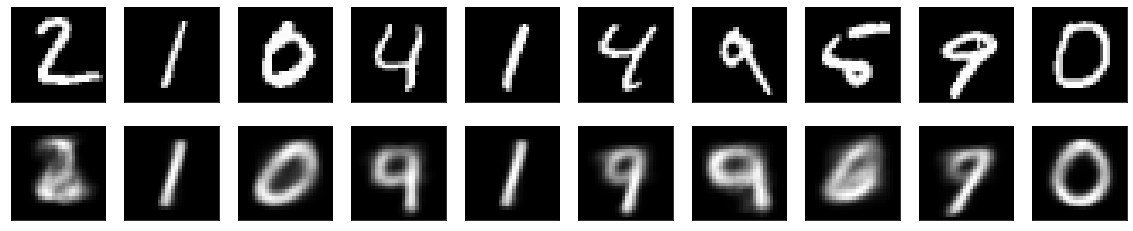

In [ ]:
#Visualize the outputs
import matplotlib.pyplot as plt

decoded_imgs = model.predict(x_test)

n = 10
plt.figure(figsize=(20, 4))
for i in range(1, n + 1):
    # Display original
    ax = plt.subplot(2, n, i)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # Display reconstruction
    ax = plt.subplot(2, n, i + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

#### How to get the output of intermediate layer ? 

In [ ]:
model.summary()

Model: "model_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_4 (InputLayer)        [(None, 784)]             0         
                                                                 
 dense_16 (Dense)            (None, 128)               100480    
                                                                 
 dense_17 (Dense)            (None, 64)                8256      
                                                                 
 dense_18 (Dense)            (None, 32)                2080      
                                                                 
 dense_19 (Dense)            (None, 16)                528       
                                                                 
 dense_20 (Dense)            (None, 8)                 136       
                                                                 
 dense_21 (Dense)            (None, 4)                 36  

We need the output of 8th layer

In [ ]:
model.layers

In [ ]:
model.layers[7].output

<KerasTensor: shape=(None, 2) dtype=float32 (created by layer 'dense_42')>

Make a new model with 
- input same as previous model and 
- 7th layer output as model output (as layers starts from 0 )

In [ ]:
dim_2_model = keras.Model(model.input, model.layers[7].output)

#### Comparing results with tsne

In [ ]:
!pip install openTSNE

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 2.7 MB 13.5 MB/s 


In [ ]:
from openTSNE import TSNE

In [ ]:
indices = np.random.choice(x_test.shape[0], 1000, replace = False)

In [ ]:
sample = x_test[indices]

In [ ]:
sample_y = y_test[indices]

In [ ]:
# tSNE
%%time
Z2 = TSNE(n_jobs=-1, initialization='random', random_state=42, negative_gradient_method='bh').fit(sample)

CPU times: user 8.23 s, sys: 51.2 ms, total: 8.28 s
Wall time: 5.05 s


#### **Visualizing t-SNE results**

In [ ]:
import seaborn as sns
from matplotlib import pyplot as plt
from matplotlib.colors import ListedColormap

cmap = ListedColormap(sns.husl_palette(len(np.unique(sample_y))))

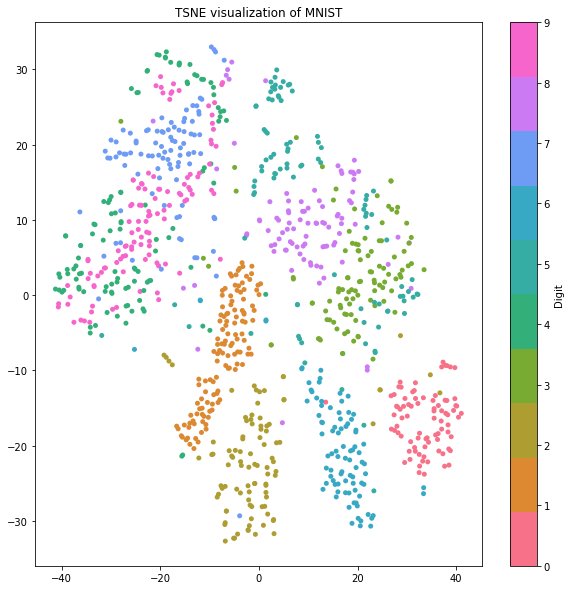

In [ ]:
fig, ax = plt.subplots()
fig.set_figheight(10)
fig.set_figwidth(10)
ax.set_title('TSNE visualization of MNIST')
im = ax.scatter(Z2[:,0], Z2[:,1], s=25, c=sample_y, cmap=cmap, edgecolor='none')
cbar = fig.colorbar(im, ax=ax,label='Digit')

#### Visualizing AE results

In [ ]:
dim_2d = dim_2_model.predict(sample)

32/32 [==============================] - 0s 1ms/step


In [ ]:
dim_2d

array([[11.213776  ,  1.3637073 ],
       [13.322133  ,  2.0465574 ],
       [ 3.4639368 ,  0.6850538 ],
       ...,
       [11.285632  ,  1.2114902 ],
       [ 5.1720624 ,  0.22647887],
       [ 3.0679882 ,  0.2426067 ]], dtype=float32)

In [ ]:
dim_2d.shape

(1000, 2)

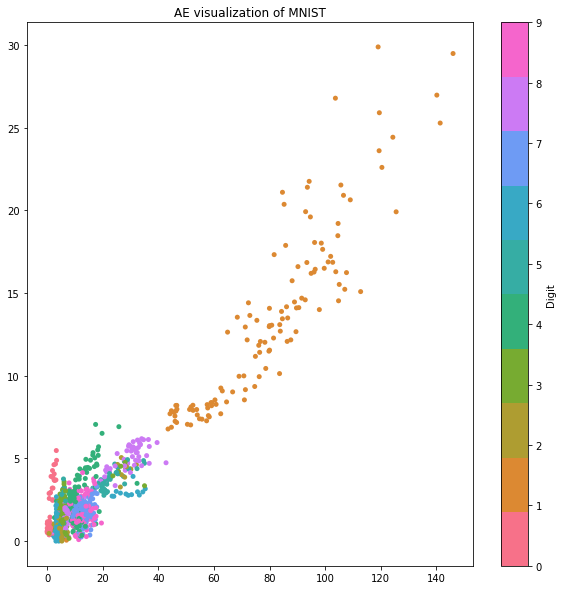

In [ ]:
fig, ax = plt.subplots()
fig.set_figheight(10)
fig.set_figwidth(10)
ax.set_title('AE visualization of MNIST')

im = ax.scatter(dim_2d[:,0], dim_2d[:,1], s=25, c=sample_y, cmap=cmap, edgecolor='none')
cbar = fig.colorbar(im, ax=ax,label='Digit')

## Feature Extraction and Transfer learning

### Feature Extraction

Consider the following neural network

<center><img src='https://drive.google.com/uc?id=1KA2oNn1McfGs6KwHevEvl78SJpR-I2A6' width="700"></center>


The idea of feature extraction is
- although there can be some information loss
- we know that emebeddings has the the information

So, we can use them as features




Once we have these embeddings,
- we can go back to ML/DL 
- and perform any task (say classification)
- with embeddings as our features.

<center><img src='https://drive.google.com/uc?id=1MhQUGUkVYNYI79su0qWWNaJUNGHfkIED' width="700"></center>



For example:

- Say, we have image data and we want to classification

#### Question: Are DT and log. regression good enough to classify image data ?

No. right.

#### What can we do instead ? 

We can run an autoencoder to get the embeddings
- and use them to run KNN, Log. reg. or Tree based model.


For recommender system
- we can get the embeddings 
- and run cosine similiarity on it 
- or cluster the embeddings.

### Transfer Learning

Consider the following complex network with millions of parameters

<center><img src='https://drive.google.com/uc?id=1Dc3nJH-8s6Hxdv97goL1aJ8ZpVRfvjW5' width="800"></center>



Suppose it is is a binary classification model
- i.e. output layer has single neuron with sigmoid as activation function

Now, the network was trained to detect 
- whether a person has cancer on not based on the images provided.



Say, our usecase is to detect whether a person has covid or not

#### What choices do we have ?

**Solution 1: Build a model from scratch and train it.**
- But we may not get the same result as researchers who ran their deep NN model on GPU for weeks/months to get the weights

**Solution 2: Use pre-trained model to get embeddings**
- We can use a pre trained model (cancer model) 
    - to generate embeddings
    - and then use those embeddings as input 
    - to run DL/ML model for our task (covid prediction)

It was orginally created for other task but we use the output of intermediate layer for another task. 

This is called as **Transfer Learning**
    

## Denoising Auto Encoders

Sometimes some encoders
- can have more number of neuron compared to input
- i.e. it's stepping up instead of stepping down

<center><img src='https://drive.google.com/uc?id=18PHAqBopJuu2_MTS2ncfcaRlGf5tNQwD' width="700"></center>



Sometimes auto encoders can overfit
- and learn something called **identity function**
- i.e. output = input 

#### How can we deal with this ? 

<center><img src='https://drive.google.com/uc?id=17FK2tFU2mhMb10lec9efrx86j3pHP1As' width="700"></center>



To deal with this,
- we add some random noise the the input 

#### What happens when we add random noise to it ?

Now, as we have added random noise to our input
- we know if network fully recreates the input
- it means network has overfitted.


And the network should not be recreate the noise 
- as there is no pattern to it

Think of it as regularization over the network
- as network can't recreate the noise
- it ends up recreating the original data

**The network cleans the data of any noise**

### Code walkthrough

In [ ]:
from keras.datasets import mnist
import numpy as np

(x_train, _), (x_test, _) = mnist.load_data()

#Normalize
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.

#Reshape
x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))

#add NOISE
noise_factor = 0.5
x_train_noisy = x_train + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_train.shape) 
x_test_noisy = x_test + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_test.shape) 

x_train_noisy = np.clip(x_train_noisy, 0., 1.)
x_test_noisy = np.clip(x_test_noisy, 0., 1.)

print(x_train.shape)
print(x_train_noisy.shape)
print(x_test.shape)
print(x_test_noisy.shape)

(60000, 784)
(60000, 784)
(10000, 784)
(10000, 784)


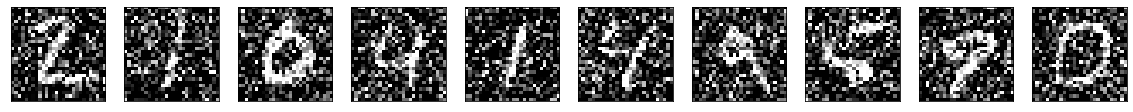

In [ ]:
n = 10
plt.figure(figsize=(20, 2))
for i in range(1, n + 1):
    ax = plt.subplot(1, n, i)
    plt.imshow(x_test_noisy[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()


In [ ]:
#AutoEncoder model
input_img = keras.Input(shape=(784,))
encoded = layers.Dense(128, activation='relu')(input_img)
encoded = layers.Dense(64, activation='relu')(encoded)
encoded = layers.Dense(32, activation='relu')(encoded)

decoded = layers.Dense(64, activation='relu')(encoded)
decoded = layers.Dense(128, activation='relu')(decoded)
decoded = layers.Dense(784, activation='sigmoid')(decoded)

# Compile and Fit
autoencoder = keras.Model(input_img, decoded)
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

autoencoder.fit(x_train_noisy, x_train, # NOTE: input is noisy, output is non-noisy
                epochs=100,
                batch_size=256,
                shuffle=True,
                validation_data=(x_test_noisy, x_test))

Epoch 1/100
235/235 [==============================] - 3s 8ms/step - loss: 0.2668 - val_loss: 0.2096
Epoch 2/100
235/235 [==============================] - 2s 7ms/step - loss: 0.1832 - val_loss: 0.1697
Epoch 3/100
235/235 [==============================] - 2s 7ms/step - loss: 0.1639 - val_loss: 0.1575
Epoch 4/100
235/235 [==============================] - 2s 8ms/step - loss: 0.1548 - val_loss: 0.1510
Epoch 5/100
235/235 [==============================] - 2s 8ms/step - loss: 0.1490 - val_loss: 0.1455
Epoch 6/100
235/235 [==============================] - 2s 8ms/step - loss: 0.1441 - val_loss: 0.1410
Epoch 7/100
235/235 [==============================] - 2s 8ms/step - loss: 0.1404 - val_loss: 0.1378
Epoch 8/100
235/235 [==============================] - 2s 7ms/step - loss: 0.1375 - val_loss: 0.1362
Epoch 9/100
235/235 [==============================] - 2s 8ms/step - loss: 0.1358 - val_loss: 0.1341
Epoch 10/100
235/235 [==============================] - 2s 7ms/step - loss: 0.1340 - val_lo

313/313 [==============================] - 1s 2ms/step


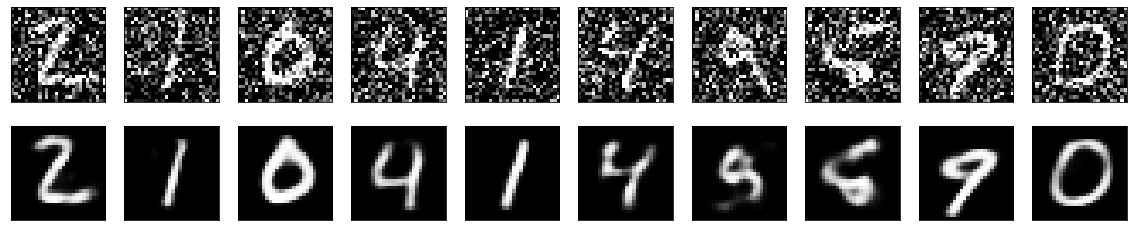

In [ ]:
#Visualize the outputs
import matplotlib.pyplot as plt

decoded_imgs = autoencoder.predict(x_test_noisy)

n = 10
plt.figure(figsize=(20, 4))
for i in range(1, n + 1):
    # Display original
    ax = plt.subplot(2, n, i)
    plt.imshow(x_test_noisy[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # Display reconstruction
    ax = plt.subplot(2, n, i + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

## Recommender System using AE

<center><img src='https://drive.google.com/uc?id=1I-AUm4W8bcadVKPWc3v-Q25JO6xpWzcf' width="700"></center>



Recall the user-item iteraction matrix
- where each row represents the user
- columns represents the movie ratings by user

Do note that this iteraction matrix is sparse

Now, we can use these item vectors (movie ratings)
- as a input to our AE
- learn a dense embeddings
- and use these embeddings to find similar movies.

### Code walkthough

In [ ]:
import numpy as np
import pandas as pd


import warnings
warnings.filterwarnings('ignore')

#### Loading data

In [ ]:
!gdown 1EsPvxcp5lzdltC3yLar1_laArmk9RZpw
!gdown 1DgdthLfHLIq3AnS4YAa1bne-OM90oHoD

Downloading...
From: https://drive.google.com/uc?id=1EsPvxcp5lzdltC3yLar1_laArmk9RZpw
To: /content/ratings.csv
100% 2.48M/2.48M [00:00<00:00, 248MB/s]
Downloading...
From: https://drive.google.com/uc?id=1DgdthLfHLIq3AnS4YAa1bne-OM90oHoD
To: /content/movies.csv
100% 516k/516k [00:00<00:00, 45.5MB/s]


In [ ]:
ratings = pd.read_csv('ratings.csv')

#### What's the shape of ratings ? 

In [ ]:
ratings.shape

(105339, 4)

#### How many unique movie ids do we have ? 

In [ ]:
ratings.movieId.unique().shape

(10325,)

In [ ]:
ratings.head()

,userId,movieId,rating,timestamp
0,1,16,4.0,1217897793
1,1,24,1.5,1217895807
2,1,32,4.0,1217896246
3,1,47,4.0,1217896556
4,1,50,4.0,1217896523


#### Pivoting ratings table 

Rows - Movie id

Columns = User id

In [ ]:
rm = ratings.pivot(index = 'movieId', columns ='userId', values = 'rating').fillna(0)
rm.head()

userId,1,2,3,4,5,6,7,8,9,10,...,659,660,661,662,663,664,665,666,667,668
movieId,,,,,,,,,,,,,,,,,,,,,
1,0.0,5.0,0.0,0.0,4.0,0.0,0.0,5.0,0.0,0.0,...,0.0,0.0,4.0,5.0,3.0,0.0,0.0,0.0,0.0,3.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0,3.0
3,0.0,2.0,0.0,0.0,0.0,0.0,0.0,4.0,3.0,0.0,...,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,3.0,3.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,...,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,2.5


In [ ]:
rm.shape

(10325, 668)

#### Check the sparsity of data

In [ ]:
(rm > 0).sum().sum() / (rm.shape[0] * rm.shape[1])

0.015272940801206305

- Only 1.5% of the values are filled


#### Splitting in train val 

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
train, val = train_test_split(rm, test_size = 0.2)

In [ ]:
X_train = train.values

In [ ]:
X_train.shape


(8260, 668)

In [ ]:
X_val = val.values

In [ ]:
X_val.shape

(2065, 668)

#### Training Auto Encoders

In [ ]:
import keras
from keras import layers

In [ ]:
input_movie = keras.Input(shape=(668,))
encoded = layers.Dense(512, activation='relu')(input_movie)
encoded = layers.Dense(256, activation='relu')(encoded)
encoded = layers.Dense(128, activation='relu')(encoded)


decoded = layers.Dense(256, activation='relu')(encoded)
decoded = layers.Dense(512, activation='relu')(decoded)
decoded = layers.Dense(668, activation='linear')(decoded)

In [ ]:
autoencoder = keras.Model(input_movie, decoded)
autoencoder.compile(optimizer='adam', loss='mean_squared_error')


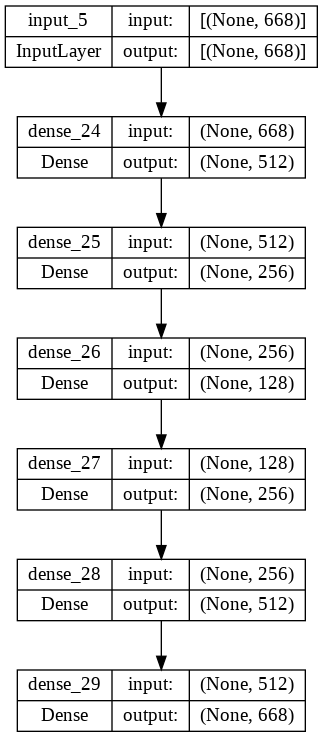

In [ ]:
from keras.utils.vis_utils import plot_model

plot_model(autoencoder, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

In [ ]:
autoencoder.fit(X_train, X_train,
                epochs=100,
                batch_size=256,
                shuffle=True,
                validation_data=(X_val, X_val))

Epoch 1/100
33/33 [==============================] - 1s 10ms/step - loss: 0.1706 - val_loss: 0.1495
Epoch 2/100
33/33 [==============================] - 0s 5ms/step - loss: 0.1466 - val_loss: 0.1352
Epoch 3/100
33/33 [==============================] - 0s 5ms/step - loss: 0.1344 - val_loss: 0.1266
Epoch 4/100
33/33 [==============================] - 0s 6ms/step - loss: 0.1247 - val_loss: 0.1209
Epoch 5/100
33/33 [==============================] - 0s 5ms/step - loss: 0.1179 - val_loss: 0.1154
Epoch 6/100
33/33 [==============================] - 0s 5ms/step - loss: 0.1109 - val_loss: 0.1115
Epoch 7/100
33/33 [==============================] - 0s 5ms/step - loss: 0.1053 - val_loss: 0.1084
Epoch 8/100
33/33 [==============================] - 0s 6ms/step - loss: 0.1012 - val_loss: 0.1063
Epoch 9/100
33/33 [==============================] - 0s 6ms/step - loss: 0.0966 - val_loss: 0.1034
Epoch 10/100
33/33 [==============================] - 0s 5ms/step - loss: 0.0924 - val_loss: 0.1013
Epoch 11

#### Extracting embeddings

Let's check which layer returns the latent space embeddings

In [ ]:
autoencoder.summary()

Model: "model_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_5 (InputLayer)        [(None, 668)]             0         
                                                                 
 dense_24 (Dense)            (None, 512)               342528    
                                                                 
 dense_25 (Dense)            (None, 256)               131328    
                                                                 
 dense_26 (Dense)            (None, 128)               32896     
                                                                 
 dense_27 (Dense)            (None, 256)               33024     
                                                                 
 dense_28 (Dense)            (None, 512)               131584    
                                                                 
 dense_29 (Dense)            (None, 668)               3426

In [ ]:
autoencoder.layers[3].output

<KerasTensor: shape=(None, 128) dtype=float32 (created by layer 'dense_26')>

Layer number 4 returns the latent space emebddings.

Let's create a model with 
- input as model input and 
- output as layer 4 output

In [ ]:
intermediate_model = keras.Model(autoencoder.input, autoencoder.layers[3].output)


#### Predicting embeddings for all movies

In [ ]:
embeddings = intermediate_model.predict(rm.values)

323/323 [==============================] - 1s 3ms/step


In [ ]:
embeddings

array([[0.0000000e+00, 0.0000000e+00, 0.0000000e+00, ..., 1.3651494e+01,
        3.4803386e+00, 0.0000000e+00],
       [0.0000000e+00, 1.1449605e-02, 0.0000000e+00, ..., 1.1319354e+00,
        1.9510438e+00, 0.0000000e+00],
       [0.0000000e+00, 0.0000000e+00, 0.0000000e+00, ..., 7.6276131e+00,
        4.5189867e+00, 0.0000000e+00],
       ...,
       [0.0000000e+00, 9.5751397e-02, 0.0000000e+00, ..., 1.9680148e-01,
        4.0758547e-01, 0.0000000e+00],
       [0.0000000e+00, 1.6079006e+00, 0.0000000e+00, ..., 4.3769965e-01,
        3.3153665e-01, 0.0000000e+00],
       [0.0000000e+00, 8.8318728e-02, 0.0000000e+00, ..., 2.2562157e-01,
        5.4051644e-01, 0.0000000e+00]], dtype=float32)

In [ ]:
embeddings.shape

(10325, 128)

In [ ]:
embeddings[10]

array([0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 1.9658452e+00,
       8.0590162e+00, 0.0000000e+00, 3.7221227e+00, 0.0000000e+00,
       1.0226821e+01, 8.1159992e+00, 0.0000000e+00, 1.8327374e+00,
       0.0000000e+00, 8.2238665e+00, 0.0000000e+00, 0.0000000e+00,
       0.0000000e+00, 0.0000000e+00, 5.6204233e+00, 3.0633299e+00,
       0.0000000e+00, 7.0646725e+00, 0.0000000e+00, 2.7049942e+00,
       0.0000000e+00, 5.9217091e+00, 4.7638183e+00, 0.0000000e+00,
       6.8396516e+00, 4.1846232e+00, 3.0754751e-01, 0.0000000e+00,
       3.5070825e-01, 2.7261753e+00, 4.8433380e+00, 4.4773763e-01,
       0.0000000e+00, 0.0000000e+00, 1.5257427e+00, 0.0000000e+00,
       0.0000000e+00, 8.0603523e+00, 0.0000000e+00, 2.1496911e+00,
       3.4151089e+00, 2.9382644e+00, 1.4833727e+01, 0.0000000e+00,
       0.0000000e+00, 7.4706016e+00, 0.0000000e+00, 0.0000000e+00,
       0.0000000e+00, 0.0000000e+00, 5.9207544e+00, 2.4117902e-03,
       6.5173354e+00, 1.0831287e+01, 0.0000000e+00, 0.0000000e

#### Finding similar movies - Cosine similarity

In [ ]:
from sklearn.metrics.pairwise import cosine_similarity


In [ ]:
similarity_matrix = cosine_similarity(embeddings)

In [ ]:
similarity_matrix.shape

(10325, 10325)

In [ ]:
similarity_matrix

array([[1.0000001 , 0.6585631 , 0.67322814, ..., 0.59645236, 0.5442955 ,
        0.5833119 ],
       [0.6585631 , 0.9999999 , 0.6800547 , ..., 0.72579706, 0.6547908 ,
        0.72038335],
       [0.67322814, 0.6800547 , 0.99999964, ..., 0.68437904, 0.64143527,
        0.6798124 ],
       ...,
       [0.59645236, 0.72579706, 0.68437904, ..., 0.9999999 , 0.77266556,
        0.99907935],
       [0.5442955 , 0.6547908 , 0.64143527, ..., 0.77266556, 0.99999994,
        0.7622129 ],
       [0.5833119 , 0.72038335, 0.6798124 , ..., 0.99907935, 0.7622129 ,
        1.0000001 ]], dtype=float32)

#### Creating df for the similarity matrix

In [ ]:
item_sim_matrix = pd.DataFrame(similarity_matrix, index=rm.index, columns=rm.index)
item_sim_matrix.head() #Item-similarity Matrix

movieId,1,2,3,4,5,6,7,8,9,10,...,144482,144656,144976,146344,146656,146684,146878,148238,148626,149532
movieId,,,,,,,,,,,,,,,,,,,,,
1,1.000000,0.658563,0.673228,0.540021,0.648697,0.654453,0.684952,0.632444,0.610780,0.654408,...,0.571254,0.589064,0.581250,0.618699,0.550565,0.553673,0.570174,0.596452,0.544295,0.583312
2,0.658563,1.000000,0.680055,0.664267,0.671681,0.682655,0.687399,0.736932,0.620380,0.721273,...,0.682567,0.722754,0.673074,0.735291,0.709819,0.600205,0.609749,0.725797,0.654791,0.720383
3,0.673228,0.680055,1.000000,0.708798,0.811759,0.733264,0.744269,0.749439,0.778765,0.572502,...,0.666188,0.681853,0.664915,0.694079,0.674888,0.702747,0.707777,0.684379,0.641435,0.679812
4,0.540021,0.664267,0.708798,1.000000,0.618423,0.682824,0.693533,0.851051,0.724973,0.665865,...,0.695002,0.742990,0.726576,0.756891,0.722054,0.685661,0.689927,0.746041,0.719017,0.740609
5,0.648697,0.671681,0.811759,0.618423,1.000000,0.671731,0.777911,0.699758,0.702049,0.590483,...,0.622101,0.651532,0.596869,0.659810,0.634000,0.613933,0.619347,0.653561,0.596539,0.649576


#### Finding movies similar to Liar Liar

In [ ]:
movies = pd.read_csv('movies.csv')

In [ ]:
movies[movies.title.str.contains('Liar Liar')]

,movieId,title,genres
1202,1485,Liar Liar (1997),Comedy


#### Sorting the movie id by similarity score

In [ ]:
item_sim_matrix[1485].sort_values(ascending=False).head(10)

movieId
1485    1.000000
1391    0.829599
104     0.816998
1760    0.815274
1608    0.812336
3033    0.810485
1407    0.809809
1461    0.808078
1020    0.806623
1777    0.803359
Name: 1485, dtype: float32

#### Fetching the index of moives

In [ ]:
movie_index = item_sim_matrix[1485].sort_values(ascending=False).head(10).index

#### Fetching the name of movies 

In [ ]:
movies[movies.movieId.isin(movie_index)]

,movieId,title,genres
94,104,Happy Gilmore (1996),Comedy
828,1020,Cool Runnings (1993),Comedy
1130,1391,Mars Attacks! (1996),Action|Comedy|Sci-Fi
1143,1407,Scream (1996),Comedy|Horror|Mystery|Thriller
1184,1461,Vegas Vacation (National Lampoon's Las Vegas V...,Comedy
1202,1485,Liar Liar (1997),Comedy
1287,1608,Air Force One (1997),Action|Thriller
1390,1760,Spice World (1997),Comedy
1398,1777,"Wedding Singer, The (1998)",Comedy|Romance
2423,3033,Spaceballs (1987),Comedy|Sci-Fi
